In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1,'/Users/user/Documents/MeerFish')
import cosmo
import model
import fisher
import survey

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import mpl_style
plt.style.use(mpl_style.style1)

## Testing multi-tracer isn't over enhancing f_NL results: 

Do this by splitting survey in two and running multi-tracer on two splits. Should deliver same results as single-tracer on the whole survey

Then try making the biases in the two halved surveys different. This should deliver some improved f_NL constraint

In [4]:
zminzmax = [1,1.2]
zminzmax = None
t_tot = 50000
z,zmin,zmax,A_sky,V_bin,theta_FWHM1,t_tot,N_dish,P_N1,nbar = survey.params(Survey1='SKA',zminzmax=zminzmax,t_tot=t_tot)

P_N1 = model.P_N(z,zmin,zmax,A_sky,t_tot,N_dish)

### k-bins:
kmin = np.pi/V_bin**(1/3) ### From Tayura https://arxiv.org/pdf/1101.4723.pdf (after eq8)
#kmin = 8e-3
kmax = 0.35
kbins = np.linspace(kmin,kmax,200)
k = (kbins[1:] + kbins[:-1])/2 #centre of k bins

### Cosmological/survey parameters:
cosmo.SetCosmology(z=z) # set initial cosmology for P_N
Pmod = cosmo.MatterPk(z,kmin=kmin/5)
f = cosmo.f(z)
a_perp = 1
a_para = 1
A_BAO = 1
f_NL = 0
b1 = model.b_HI(z)
bphi1 = cosmo.b_phi_universality(b1)
Tbar1 = model.Tbar(z,Omega_HI=0.86e-3)
sigma_z1 = 0

$b_1$$=1.87\pm0.00178$
$b_1$$=1.87\pm0.00185$
$b_1$$=1.87\pm0.00161$
$b_2$$=3.87\pm0.00$
$b_2$$=3.87\pm0.00185$
$b_2$$=3.87\pm0.00274$
$f_{\rm NL}$$=0.00\pm2.43$
$f_{\rm NL}$$=0.00\pm2.43$
$f_{\rm NL}$$=0.00\pm0.963$


/Users/user/opt/anaconda3/envs/env1/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


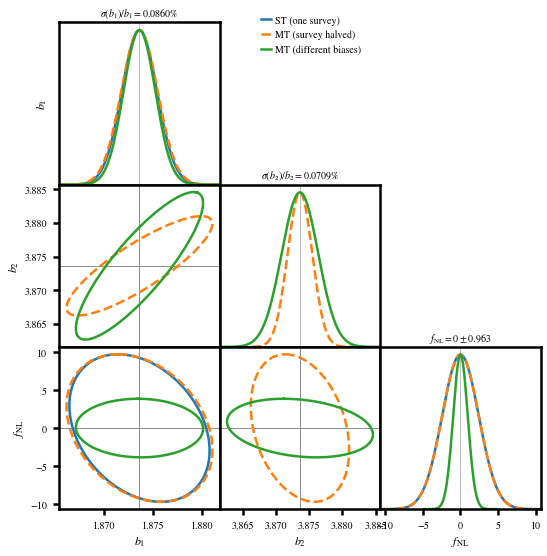

In [3]:
################################################################################################
import model
theta_ids = [\
#r'$\overline{T}_{\rm HI}$',\
r'$b_1$',\
r'$b_2$',\
#r'$b^\phi_1$',\
#r'$b^\phi_2$',\
#r'$f$',\
#r'$\alpha_\perp$',\
#r'$\alpha_\parallel$',\
#r'$A_{\rm BAO}$',\
r'$f_{\rm NL}$'\
]

Fs = []
ells = [0,2]

#b1 = 3

### Single tracer for 1 survey:
P_N1 = model.P_N(z,zmin,zmax,A_sky,t_tot,N_dish)
surveypars = z,V_bin,V_bin,theta_FWHM1,theta_FWHM1,sigma_z1,sigma_z1,P_N1,P_N1
cosmopars = np.array([Tbar1,Tbar1,b1,b1,bphi1,bphi1,f,a_perp,a_para,A_BAO,f_NL])
theta = model.get_param_vals(theta_ids,z,cosmopars)
Fs.append( fisher.Matrix_ell(theta_ids,k,Pmod,cosmopars,surveypars,ells,tracer='1') )

### Split survey in half and take it's multi-tracer (shouldn't improve on single-tracer):
t_tot_split = t_tot/2
P_N1 = model.P_N(z,zmin,zmax,A_sky,t_tot_split,N_dish)
surveypars = z,V_bin,V_bin,theta_FWHM1,theta_FWHM1,sigma_z1,sigma_z1,P_N1,P_N1
cosmopars = np.array([Tbar1,Tbar1,b1,b1,bphi1,bphi1,f,a_perp,a_para,A_BAO,f_NL])
theta = model.get_param_vals(theta_ids,z,cosmopars)
Fs.append( fisher.Matrix_ell(theta_ids,k,Pmod,cosmopars,surveypars,ells,tracer='MT') )

### Multi-tracer of same two surveys now with different bias:
b2 = b1 + 2
bphi2 = cosmo.b_phi_universality(b2)
surveypars = z,V_bin,V_bin,theta_FWHM1,theta_FWHM1,sigma_z1,sigma_z1,P_N1,P_N1
cosmopars = np.array([Tbar1,Tbar1,b1,b2,bphi1,bphi2,f,a_perp,a_para,A_BAO,f_NL])
theta = model.get_param_vals(theta_ids,z,cosmopars)
Fs.append( fisher.Matrix_ell(theta_ids,k,Pmod,cosmopars,surveypars,ells,tracer='MT') )

Flabels = ['ST (one survey)','MT (survey halved)','MT (different biases)']
ls = ['-','--','-']

fontsize = 10
fisher.CornerPlot(Fs,theta,theta_ids,Flabels=Flabels,ls=ls,fontsize=fontsize)
plt.show()